# Importing Modules


In [346]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [347]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Analysis


In [348]:
print(train_data.shape)
train_data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [349]:
train_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
528,529,0,3,"Salonen, Mr. Johan Werner",male,39.0,0,0,3101296,7.9250,NaN,S
758,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.0,0,0,363294,8.0500,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
573,574,1,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.7500,NaN,Q
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
490,491,0,3,"Hagland, Mr. Konrad Mathias Reiersen",male,NaN,1,0,65304,19.9667,NaN,S
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S


# Handling Types of Features


In [350]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [351]:
train_data.drop(columns='Survived', inplace=True)

categorical_features = ['Name', 'Pclass',
                        'Sex', 'Ticket', 'Cabin', 'Embarked']

for feature in categorical_features:
    train_data[feature] = train_data[feature].astype("category")
    test_data[feature] = train_data[feature].astype("category")

numerical_features = train_data.select_dtypes(
    include=['float64', 'int64']).columns

In [352]:
train_data.dtypes

PassengerId       int64
Pclass         category
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

# Missing Data


In [353]:
print(f"Train data: \n{train_data.isna().sum()}\n")
print(f"Test data: \n{test_data.isna().sum()}")

print(f"Total rows: \nTrain: {len(train_data)} \nTest: {len(test_data)}")

Train data: 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test data: 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          326
Embarked         1
dtype: int64
Total rows: 
Train: 891 
Test: 418


In [354]:
train_data[train_data.duplicated()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [355]:
# dropping irrelevant columns
columns_to_drop = ['PassengerId', 'Name',
                   'Cabin', 'Ticket']

train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

In [356]:
categorical_features = [
    x for x in categorical_features if x not in columns_to_drop]
numerical_features = [
    x for x in numerical_features if x not in columns_to_drop]

In [357]:
train_data.dtypes

Pclass      category
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
dtype: object

In [358]:
# Imputation missing data

train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

test_data['Fare'].fillna(test_data['Fare'].mode()[0], inplace=True)

/var/folders/rh/0t7nw3r93v7_cvbwx62mtdsh0000gn/T/ipykernel_92488/4167904764.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
/var/folders/rh/0t7nw3r93v7_cvbwx62mtdsh0000gn/T/ipykernel_92488/4167904764.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

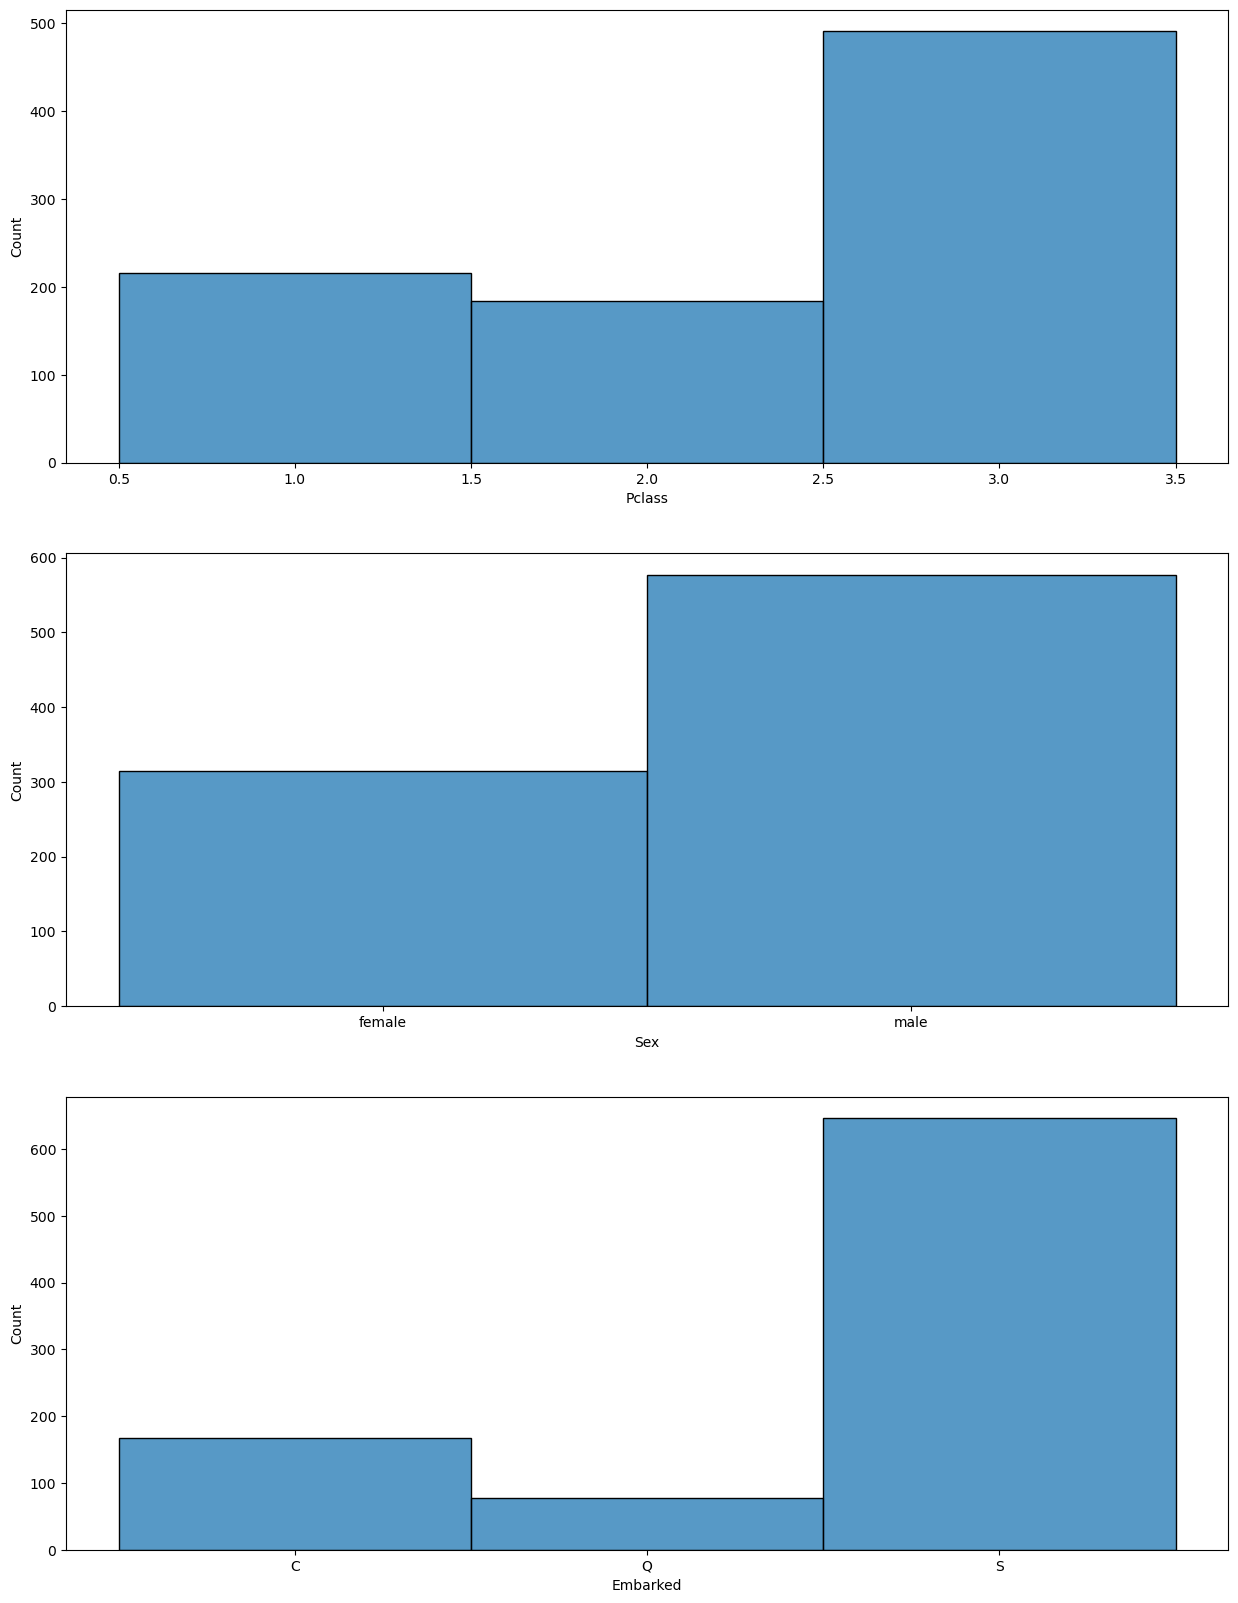

In [359]:
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1)
fig.set_size_inches(15, 20)
for i, col in enumerate(categorical_features):
    sns.histplot(train_data[col], kde=False, ax=axes[i])
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

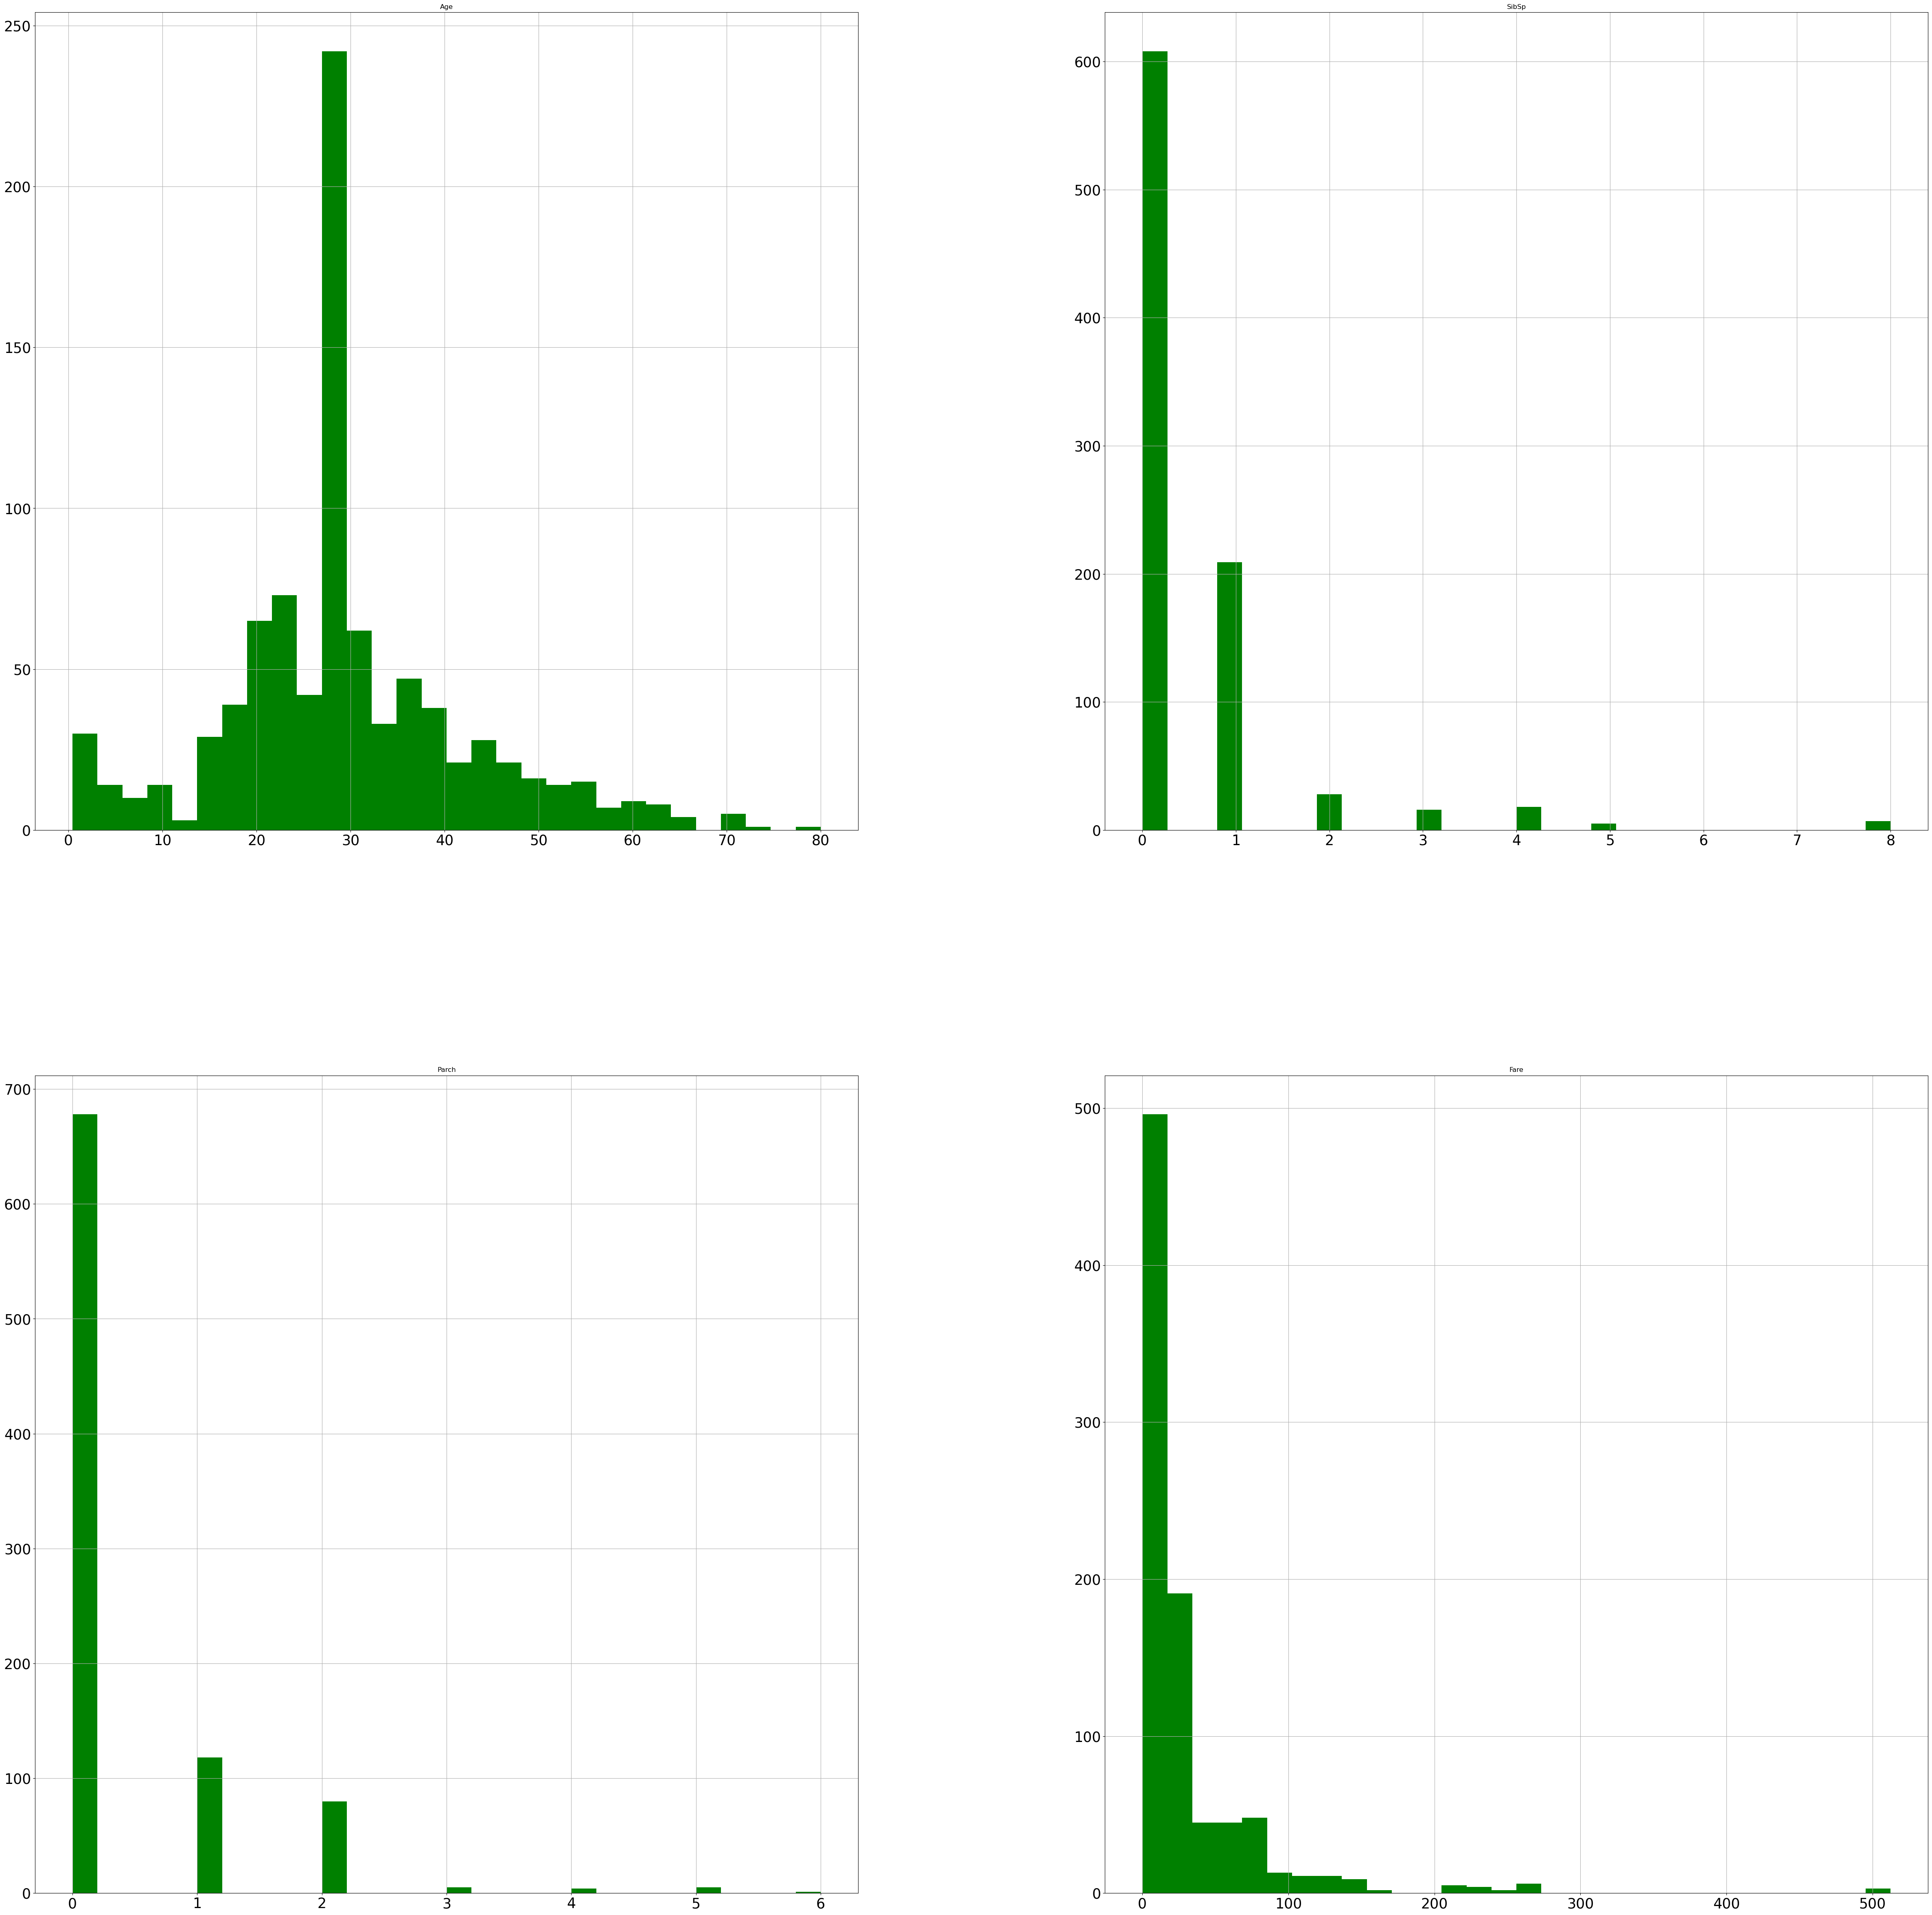

In [360]:
train_data[numerical_features].hist(
    figsize=(60, 60), color='g', bins=30, xlabelsize=25, ylabelsize=25)

In [361]:
train_data_encoded = pd.get_dummies(train_data, columns=categorical_features)
test_data_encoded = pd.get_dummies(test_data, columns=categorical_features)

# K-means Clustering


In [362]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [363]:
def cluster_kmeans(data, clusters_amount):
    cluster_algorithm = KMeans(
        n_clusters=clusters_amount, n_init=10, random_state=42)
    cluster_algorithm.fit(data)
    cluster_labels = cluster_algorithm.labels_

    silhouette = silhouette_score(data, cluster_labels, metric='euclidean')
    return cluster_labels, silhouette

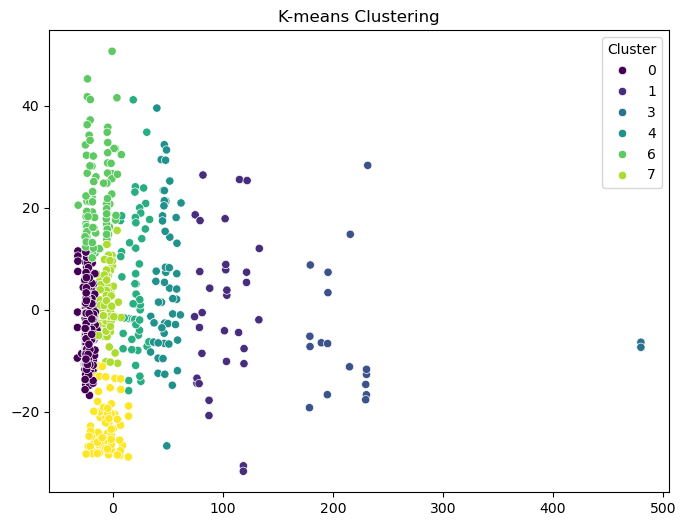

Best K-means Silhouette Score: 0.7913321521139329 at k=2


In [364]:
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_data_encoded)

silhouette_scores = []

for i in range(2, 10):
    kmeans_labels, silhouette = cluster_kmeans(train_data_encoded, i)
    silhouette_scores.append((i, silhouette))

best_kmeans_k = max(silhouette_scores, key=lambda x: x[1])[0]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_pca[:, 0], y=train_pca[:, 1],
                hue=kmeans_labels, palette="viridis")
plt.title(f'K-means Clustering')
plt.legend(title='Cluster')
plt.show()

print(
    f"Best K-means Silhouette Score: {max(silhouette_scores, key=lambda x: x[1])[1]} at k={best_kmeans_k}")

# DBSCAN Clustering


In [365]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [366]:
def cluster_dbscan(data, eps):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    cluster_algorithm = DBSCAN(eps=eps, min_samples=5)
    cluster_labels = cluster_algorithm.fit_predict(data_scaled)

    silhouette = silhouette_score(data_scaled, cluster_labels)
    return cluster_labels, silhouette

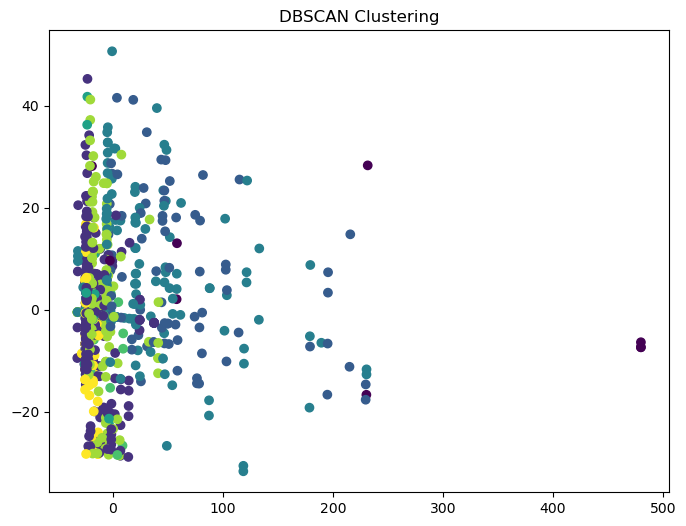

Best K-means Silhouette Score: 0.518582662748741 at eps=2


In [367]:
epsilons = [0.1, 1.5, 2.0, 2.5, 3.0]
silhouette_scores = []

for eps in epsilons:
    dbscan_labels, silhouette = cluster_dbscan(train_data_encoded, eps)
    silhouette_scores.append((eps, silhouette))

best_dbscan_k = max(silhouette_scores, key=lambda x: x[1])[0]

plt.figure(figsize=(8, 6))
plt.scatter(x=train_pca[:, 0], y=train_pca[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()

print(
    f"Best K-means Silhouette Score: {max(silhouette_scores, key=lambda x: x[1])[1]} at eps={best_kmeans_k}")

# Agglomerative Clustering


In [368]:
from sklearn.cluster import AgglomerativeClustering

In [369]:
def cluster_agglomerative(data, clusters_amount):
    cluster_algorithm = AgglomerativeClustering(n_clusters=clusters_amount)
    cluster_algorithm.fit(data)
    cluster_labels = cluster_algorithm.labels_

    silhouette = silhouette_score(data, cluster_labels, metric='euclidean')
    return cluster_labels, silhouette

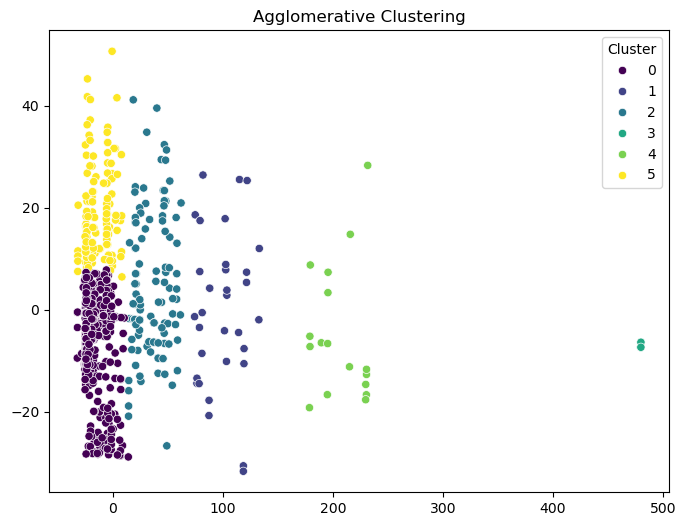

Best Agglomerative Silhouette Score: 0.8466105877755181 at k=2


In [370]:
silhouette_scores = []

for i in range(2, 7):
    agglo_labels, silhouette = cluster_agglomerative(train_data_encoded, i)
    silhouette_scores.append((i, silhouette))

best_agglomerative_k = max(silhouette_scores, key=lambda x: x[1])[0]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_pca[:, 0], y=train_pca[:, 1],
                hue=agglo_labels, palette="viridis")
plt.title(f'Agglomerative Clustering')
plt.legend(title='Cluster')
plt.show()

print(
    f"Best Agglomerative Silhouette Score: {max(silhouette_scores, key=lambda x: x[1])[1]} at k={best_kmeans_k}")